# Import Data

In [ ]:
#membuat akses ke google drive untuk load data

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Forecasting_Metoper/Rata-rata harga beras.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tahun          50 non-null     int64  
 1   Bulan          50 non-null     object 
 2   Premium        50 non-null     float64
 3   Medium         50 non-null     float64
 4   Luar Kualitas  50 non-null     float64
 5   Date           50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")

- Premium: Maksimum beras patah s.d. 15%
- Medium: Beras patah 15,01% –25%
- Luar Kualitas: Beras patah di atas 25%

In [ ]:
df.head(10)

,Tahun,Bulan,Premium,Medium,Luar Kualitas,Date
0,2020,Januari,10032.66,9805.40,9518.85,2020-01-01
1,2020,Februari,10080.80,9844.13,9521.95,2020-02-01
2,2020,Maret,10082.43,9826.68,9460.76,2020-03-01
3,2020,April,10018.19,9671.03,8989.00,2020-04-01
4,2020,Mei,9826.63,9526.55,8972.52,2020-05-01
5,2020,Juni,9918.95,9445.31,8926.15,2020-06-01
6,2020,Juli,9931.71,9316.30,8919.58,2020-07-01
7,2020,Agustus,9962.65,9334.90,8986.32,2020-08-01
8,2020,September,9871.12,9404.58,9026.05,2020-09-01
9,2020,Oktober,9812.90,9462.81,9146.54,2020-10-01


In [ ]:
df.shape

(50, 12)

# EDA

In [ ]:
import seaborn as sns

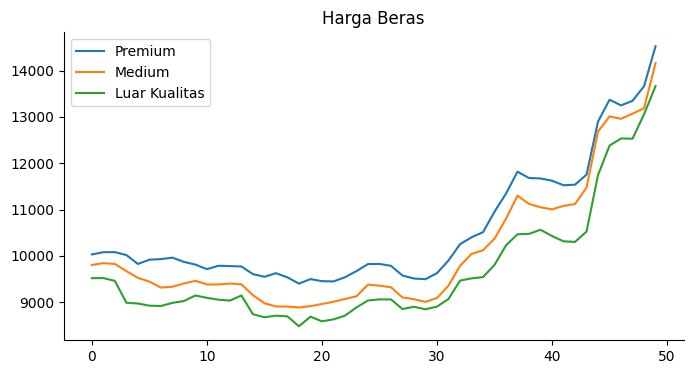

In [ ]:
df['Premium'].plot(kind='line', figsize=(8, 4), title='Produksi')
df['Medium'].plot(kind='line', figsize=(8, 4), title='Produksi vs Jual')
df['Luar Kualitas'].plot(kind='line', figsize=(8, 4), title='Harga Beras')
plt.legend(['Premium', 'Medium', 'Luar Kualitas'], loc="upper left")
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['Selisih Premium'] = df['Premium'] - df['Medium']
df['Selisih Rendah'] = df['Medium'] - df['Luar Kualitas']

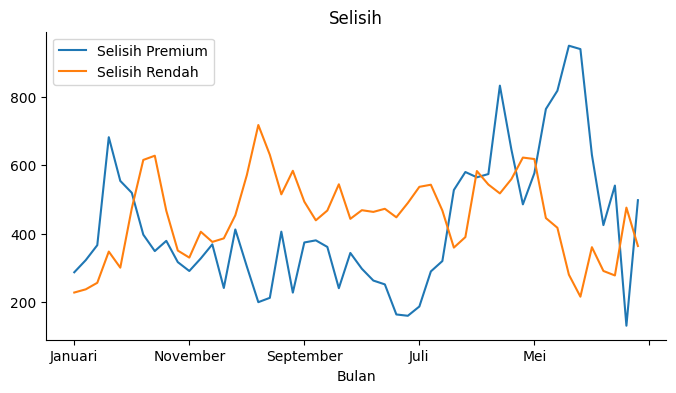

In [ ]:
#df['Selisih Premium'].plot(x = df['Bulan'], kind='line', figsize=(8, 4), title='Produksi')
df.plot(x = 'Bulan', y= ['Selisih Rendah', 'Selisih Premium'], kind='line', figsize=(8, 4), title='Selisih')
plt.legend(['Selisih Premium', 'Selisih Rendah'], loc="upper left")
plt.gca().spines[['top', 'right']].set_visible(False)

# Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

## Medium Test

In [ ]:
adf_test(df['Medium'])

ADF Statistics: -1.0188273723475127
p- value: 0.7463356641846642
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df['Medium First Difference']=df['Medium']-df['Medium'].shift(1)

In [ ]:
adf_test(df['Medium First Difference'].dropna())

ADF Statistics: 0.3279522137026583
p- value: 0.9785911928144914
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df['Medium Second Difference']=df['Medium First Difference']-df['Medium First Difference'].shift(1)

In [ ]:
adf_test(df['Medium Second Difference'].dropna())

ADF Statistics: -5.380545787302807
p- value: 3.7208971986458266e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

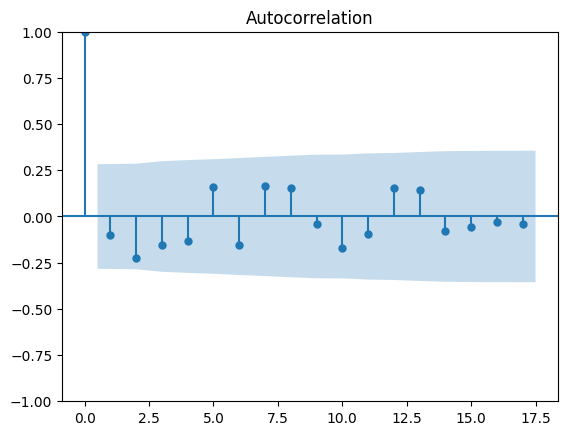

In [ ]:
acf = plot_acf(df["Medium Second Difference"].dropna())

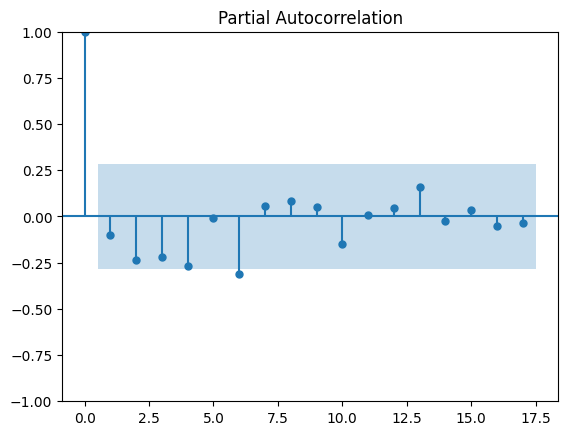

In [ ]:
result = plot_pacf(df["Medium Second Difference"].dropna())

## Selisih Premium

In [ ]:
adf_test(df['Selisih Premium'])

ADF Statistics: -3.180301081418878
p- value: 0.02115362207718266
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


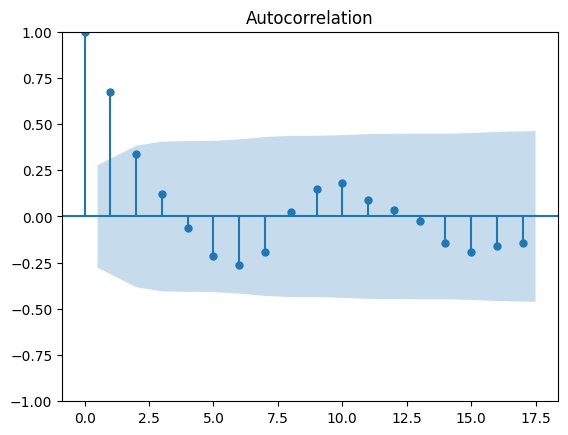

In [ ]:
acf = plot_acf(df["Selisih Premium"].dropna())

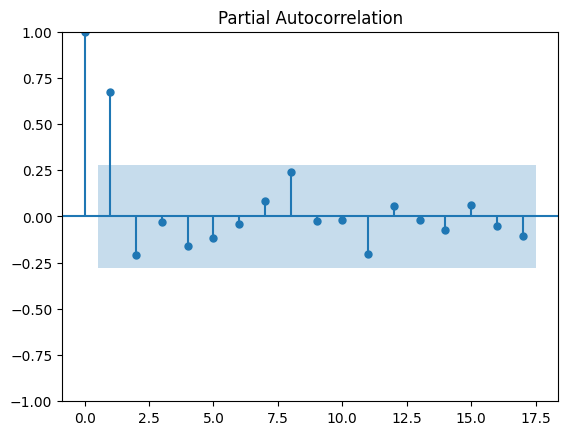

In [ ]:
result = plot_pacf(df["Selisih Premium"].dropna())

## Premium test

In [ ]:
adf_test(df['Premium'])

ADF Statistics: 1.441298285931821
p- value: 0.9972939104057285
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df['Premium First Difference']=df['Premium']-df['Premium'].shift(1)

In [ ]:
adf_test(df['Premium First Difference'].dropna())

ADF Statistics: 0.24446571491238925
p- value: 0.9746481260657458
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df['Premium Second Difference']=df['Premium First Difference']-df['Premium First Difference'].shift(1)

In [ ]:
adf_test(df['Premium Second Difference'].dropna())

ADF Statistics: -4.563523589227115
p- value: 0.0001507140069024832
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


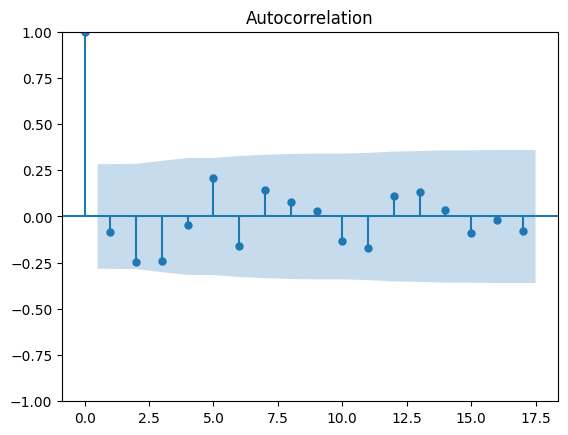

In [ ]:
acf = plot_acf(df["Premium Second Difference"].dropna())

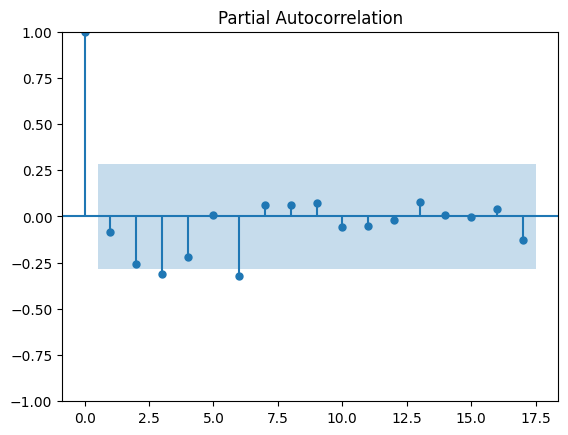

In [ ]:
result = plot_pacf(df["Premium Second Difference"].dropna())

## Holt

In [ ]:
df.head()

,Tahun,Bulan,Premium,Medium,Luar Kualitas,Selisih Premium,Selisih Rendah,Medium First Difference,Medium Second Difference,Premium First Difference,Premium Second Difference,Selisih Rendah First Difference
0,2020,Januari,10032.66,9805.40,9518.85,227.26,286.55,NaN,NaN,NaN,NaN,NaN
1,2020,Februari,10080.80,9844.13,9521.95,236.67,322.18,38.73,NaN,48.14,NaN,35.63
2,2020,Maret,10082.43,9826.68,9460.76,255.75,365.92,-17.45,-56.18,1.63,-46.51,43.74
3,2020,April,10018.19,9671.03,8989.00,347.16,682.03,-155.65,-138.20,-64.24,-65.87,316.11
4,2020,Mei,9826.63,9526.55,8972.52,300.08,554.03,-144.48,11.17,-191.56,-127.32,-128.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tahun          50 non-null     int64         
 1   Bulan          50 non-null     object        
 2   Premium        50 non-null     float64       
 3   Medium         50 non-null     float64       
 4   Luar Kualitas  50 non-null     float64       
 5   Date           50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
df.set_index('Date', inplace=True)

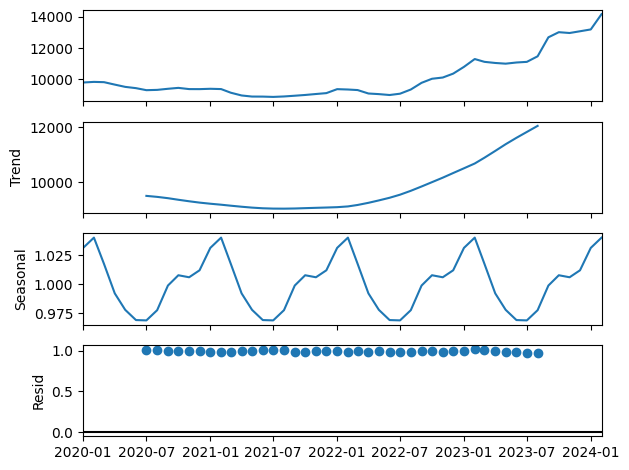

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#df.set_index('Date', inplace=True)

analysis = df[['Medium']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
%matplotlib inline
plt.style.use('Solarize_Light2')

In [ ]:
train = df.iloc[0:-10, :]
test = df.iloc[-10:, :]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()

In [ ]:
model = SimpleExpSmoothing(np.asarray(train['Medium']))
model.index = pd.to_datetime(train.index)

In [ ]:
fit1 = model.fit()
pred1 = fit1.forecast(9)

fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)

fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
model = Holt(np.asarray(train['Medium']))
model.index = pd.to_datetime(train.index)

In [ ]:
fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(10)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(10)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(10)

<ipython-input-78-8308d25e9523>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-78-8308d25e9523>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


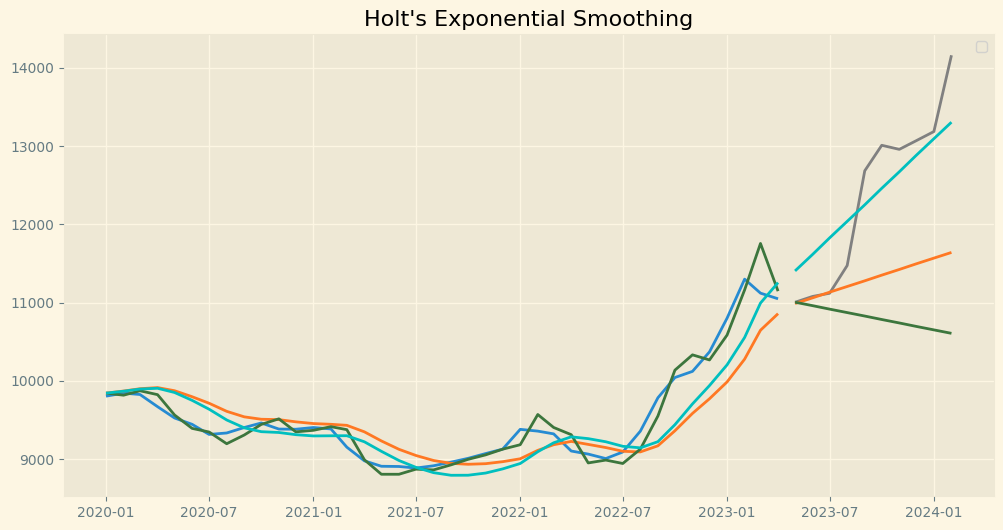

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[0:], train.Medium[0:])
ax.plot(test.index, test.Medium, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[0:], f.fittedvalues[0:], color=c)
    ax.plot(test.index, p, color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

In [ ]:
pred3

array([11405.87791148, 11617.06728208, 11828.25665268, 12039.44602329,
       12250.63539389, 12461.82476449, 12673.0141351 , 12884.2035057 ,
       13095.3928763 , 13306.5822469 ])

# Exercise 4.26

In [ ]:
df_exercise = pd.read_excel("/content/drive/MyDrive/Forecasting_Metoper/Data Tabel B.9.xlsx")

In [ ]:
df_exercise.head()

,Year,Sunspot Number
0,1700,5.1
1,1701,11.1
2,1702,16.1
3,1703,23.1
4,1704,36.1


In [ ]:
df_exercise.shape

(305, 2)

In [ ]:
model = SimpleExpSmoothing(np.asarray(df_exercise['Sunspot Number']))
model.index = pd.to_datetime(train.Year)

In [ ]:
#1.22781
#0.1
fit_1 = model.fit(smoothing_level= 1.22781, optimized = False)
pred = fit_1.forecast(1)

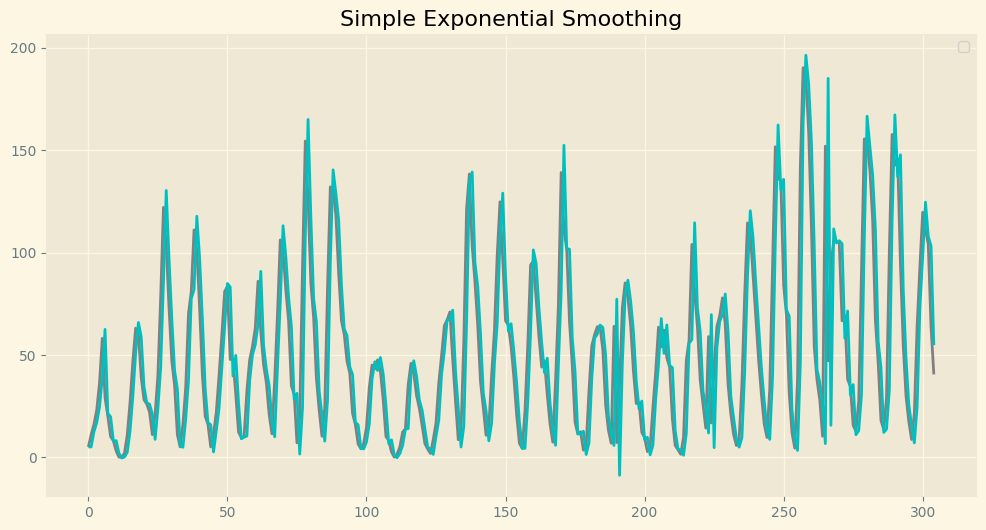

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_exercise.index[0:], df_exercise['Sunspot Number'][0:], color = 'gray')
#ax.plot(test.index, test['Sunspot Number'], color="yellow")

ax.plot(df_exercise.index[0:], fit_1.fittedvalues[0:], color=c)
#ax.plot(test.index, pred, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")
plt.legend();

In [ ]:
model_2 = Holt(np.asarray(df_exercise['Sunspot Number']))
model_2.index = pd.to_datetime(train.Year)

In [ ]:
#1.22781
#0.1
fit = model_2.fit(smoothing_level= 1.22781)
pred_simple = fit.forecast(1)

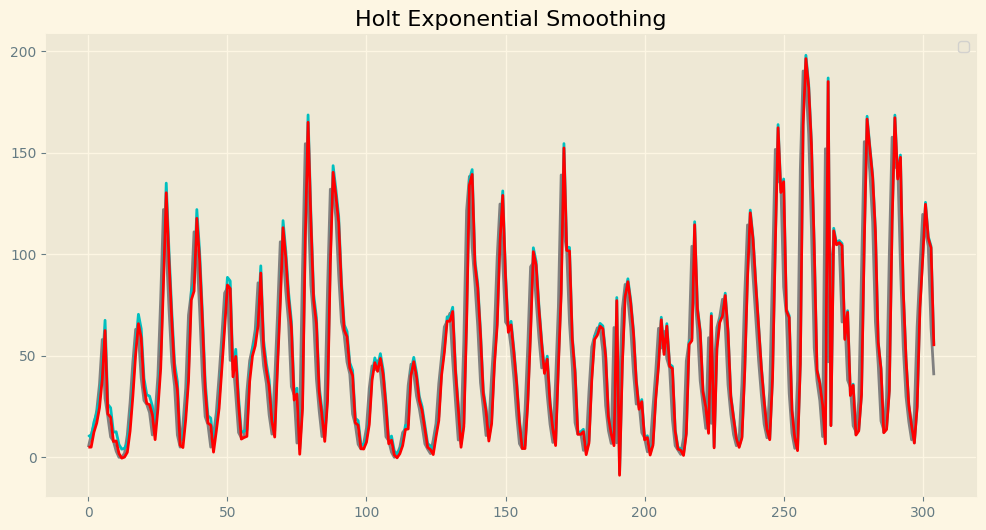

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_exercise.index[0:], df_exercise['Sunspot Number'][0:], color = 'gray')
#ax.plot(test.index, test['Sunspot Number'], color="yellow")

ax.plot(df_exercise.index[0:], fit.fittedvalues[0:], color=c)
ax.plot(df_exercise.index[0:], fit_1.fittedvalues[0:], color="red")
#ax.plot(test.index, pred, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Holt Exponential Smoothing")
plt.legend();

In [ ]:
df_exercise['simple_fit'] = fit_1.fittedvalues[0:]
df_exercise['holt_fit'] = fit.fittedvalues[0:]


In [ ]:
df_exercise['simple_fit_error'] = abs(df_exercise['simple_fit']-df_exercise['Sunspot Number'])
df_exercise['holt_fit_error'] = abs(df_exercise['holt_fit']-df_exercise['Sunspot Number'])

In [ ]:
df_exercise['simple_fit_error'].mean()

17.94113058707958

In [ ]:
print(f"MAE simple: {df_exercise['simple_fit_error'].mean()}")
print(f"MAE holt: {df_exercise['holt_fit_error'].mean()}")

MAE simple: 17.94113058707958
MAE holt: 18.305965340054268


In [ ]:
adf_test(df_exercise['Sunspot Number'])

ADF Statistics: -2.9236947433029012
p- value: 0.04266119029195312
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
